📏 BFS Calculated Shortest Path: 7 steps
🤖 Training Agent...
✅ Training Complete!


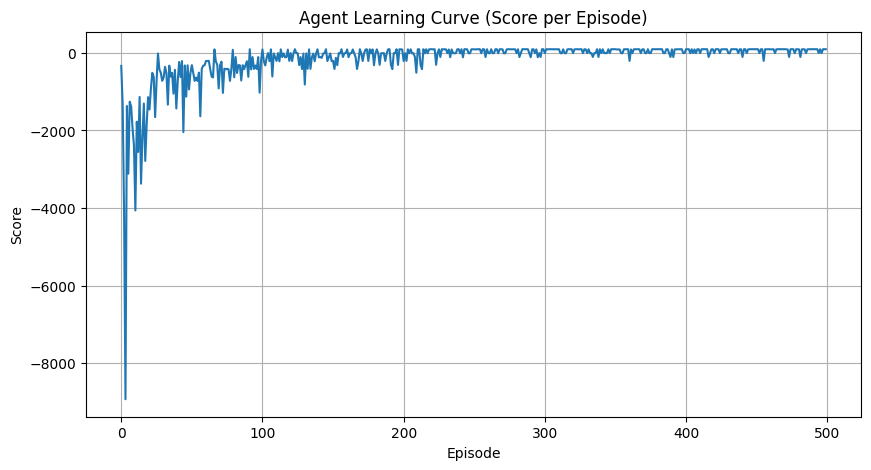


🎬 Demonstation Run:
🤖 Agent reached goal in 7 steps (Optimal was 7)


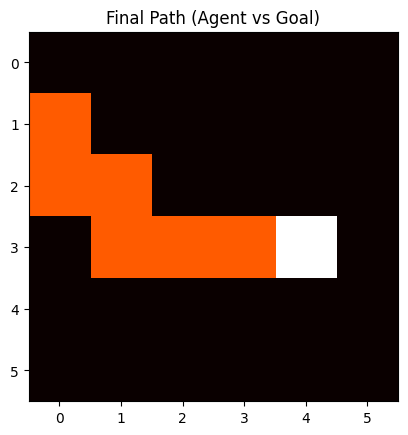

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
from IPython.display import clear_output

class GridEnvironment:
    def __init__(self, size=6, num_obstacles=10):
        self.size = size
        self.actions = ['up', 'down', 'left', 'right']
        self.obstacles = set()
        self.generate_grid(num_obstacles)

    def generate_grid(self, num_obstacles):
        while True:
            self.goal = (np.random.randint(0, self.size), np.random.randint(0, self.size))
            if self.goal != (0, 0): break

        self.obstacles = set()
        while len(self.obstacles) < num_obstacles:
            state = (np.random.randint(0, self.size), np.random.randint(0, self.size))
            if state != (0, 0) and state != self.goal:
                self.obstacles.add(state)

    def step(self, state, action):
        i, j = state
        if action == 'up':    i = max(i - 1, 0)
        elif action == 'down':  i = min(i + 1, self.size - 1)
        elif action == 'left':  j = max(j - 1, 0)
        elif action == 'right': j = min(j + 1, self.size - 1)

        next_state = (i, j)

        if next_state in self.obstacles:
            return state, -100, False  # Hit obstacle (stay in place, heavy penalty)
        if next_state == self.goal:
            return next_state, 100, True # Goal reached!
        return next_state, -1, False     # Standard step cost

class BFSSolver:
    @staticmethod
    def get_shortest_path(env, start=(0,0)):
        queue = deque([(start, 0)]) # (state, steps)
        visited = set([start])

        while queue:
            (curr_r, curr_c), steps = queue.popleft()
            if (curr_r, curr_c) == env.goal:
                return steps

            # Check 4 directions
            directions = [(-1,0), (1,0), (0,-1), (0,1)]
            for dr, dc in directions:
                next_r, next_c = curr_r + dr, curr_c + dc
                next_state = (next_r, next_c)

                # Check bounds and obstacles
                if (0 <= next_r < env.size and 0 <= next_c < env.size
                    and next_state not in env.obstacles
                    and next_state not in visited):
                    visited.add(next_state)
                    queue.append((next_state, steps + 1))
        return -1 # No path found


class QLearningAgent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros((env.size, env.size, len(env.actions)))
        self.alpha = 0.1   # Learning Rate
        self.gamma = 0.9   # Discount Factor
        self.epsilon = 1.0 # Exploration Rate
        self.epsilon_decay = 0.995
        self.min_epsilon = 0.01

    def choose_action(self, state, train=True):
        if train and np.random.rand() < self.epsilon:
            return np.random.choice(len(self.env.actions)) # Explore
        return np.argmax(self.q_table[state[0], state[1]]) # Exploit

    def train(self, episodes=500):
        rewards_history = []

        print("🤖 Training Agent...")
        for episode in range(episodes):
            state = (0, 0)
            total_reward = 0
            done = False

            while not done:
                action_idx = self.choose_action(state)
                action_str = self.env.actions[action_idx]

                next_state, reward, done = self.env.step(state, action_str)

                # Q-Learning Formula
                old_value = self.q_table[state[0], state[1], action_idx]
                next_max = np.max(self.q_table[next_state[0], next_state[1]])

                new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
                self.q_table[state[0], state[1], action_idx] = new_value

                state = next_state
                total_reward += reward

                if done: break

            # Decay epsilon
            if self.epsilon > self.min_epsilon:
                self.epsilon *= self.epsilon_decay

            rewards_history.append(total_reward)

        print("✅ Training Complete!")
        return rewards_history

# Setup
env = GridEnvironment()
agent = QLearningAgent(env)
bfs = BFSSolver()

# Calculate optimal path using DSA (BFS)
optimal_steps = bfs.get_shortest_path(env)
print(f"📏 BFS Calculated Shortest Path: {optimal_steps} steps")

# Train Agent
history = agent.train(episodes=500)

# Visualization 1: Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title("Agent Learning Curve (Score per Episode)")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Final Test Run
state = (0, 0)
steps = 0
path_visual = np.zeros((env.size, env.size))

print("\n🎬 Demonstation Run:")
while state != env.goal and steps < 20:
    action_idx = agent.choose_action(state, train=False)
    state, _, _ = env.step(state, env.actions[action_idx])
    path_visual[state] = 0.5 # Mark path
    steps += 1

path_visual[env.goal] = 1.0 # Mark Goal
print(f"🤖 Agent reached goal in {steps} steps (Optimal was {optimal_steps})")

# Simple grid visualization
plt.imshow(path_visual, cmap='hot')
plt.title(f"Final Path (Agent vs Goal)")
plt.show()

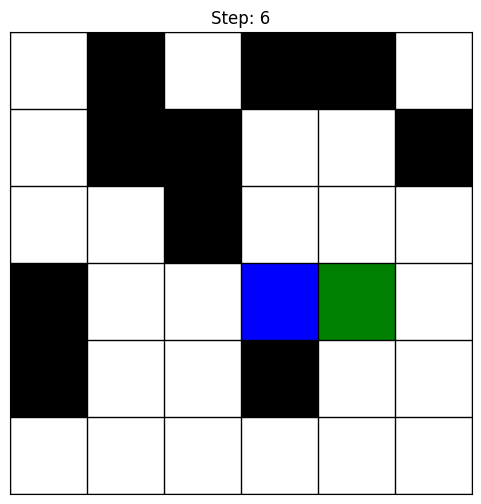

Animation Finished.


In [ ]:
import matplotlib.colors as mcolors

def animate_run(env, agent):
    state = (0, 0)
    step = 0
    done = False

    cmap = mcolors.ListedColormap(['white', 'black', 'green', 'blue'])
    bounds = [0, 1, 2, 3, 4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    try:
        while not done and step < 30:
            grid_visual = np.zeros((env.size, env.size))

            # Mark obstacles
            for obs in env.obstacles:
                grid_visual[obs] = 1

            # Mark goal
            grid_visual[env.goal] = 2

            # Mark agent
            grid_visual[state] = 3

            # 2. Plotting
            clear_output(wait=True) # Clears the previous frame
            plt.figure(figsize=(6, 6))
            plt.imshow(grid_visual, cmap=cmap, norm=norm)

            # Add grid lines for "Game" feel
            plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
            plt.xticks(np.arange(-0.5, env.size, 1)); plt.yticks(np.arange(-0.5, env.size, 1))
            plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

            plt.title(f"Step: {step}")
            plt.show()

            # 3. Agent takes action
            action_idx = agent.choose_action(state, train=False)
            state, _, done = env.step(state, env.actions[action_idx])

            step += 1
            time.sleep(0.5) # Pause to create animation effect

        print("Animation Finished.")

    except KeyboardInterrupt:
        print("Animation Stopped.")

# Run the animation
animate_run(env, agent)